# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from scipy.stats import chi2_contingency, ttest_ind

# Importing the dataset

In [4]:
df= pd.read_csv('ibm_data_python.csv')

In [5]:
df = pd.read_csv('/Users/sourasishsaha/Downloads/ibm_data_python.csv')

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [8]:
x

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, nan, 'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [9]:
y

array([1, 1, 1, ..., 0, 0, 0])

# view distinct categorical variable

In [11]:
subset_data = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'bmi', 'smoking_status']]

# Apply unique to each column
unique_values = {col: subset_data[col].unique() for col in subset_data.columns}

print(unique_values)


{'gender': array(['Male', 'Female', 'Other'], dtype=object), 'ever_married': array(['Yes', 'No'], dtype=object), 'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object), 'Residence_type': array(['Urban', 'Rural'], dtype=object), 'bmi': array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5,

# missing values 

In [13]:
# Custom function to count "Unknown","Other",Nan  values
def count_missing_values(x):
    return x.isna().sum() + (x == "Unknown").sum()+(x=="Other").sum()

# Apply the function to each column
missing_values_counts = df.apply(count_missing_values)
print(missing_values_counts)

id                      0
gender                  1
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64


# cleaning gender column

In [15]:
# Display the frequency of each value in the 'gender' column
print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [16]:
# Replace "Other" gender with "Female"
df['gender'] = df['gender'].replace("Other", "Female")

# Display the frequency of each value in the 'gender' column after the replacement
print(df['gender'].value_counts())

gender
Female    2995
Male      2115
Name: count, dtype: int64


# cleaning BMI column

In [18]:
# Get a summary of the 'bmi' column
print(df['bmi'].describe())
print(df['age'].describe())

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64
count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


In [19]:
# Replace N/A values with the median of the 'bmi' column
df['bmi'].fillna(df['bmi'].median(), inplace=True)

# Get a summary of the 'bmi' column after replacement
print(df['bmi'].describe())

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_66784/3740288036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


# cleaning smoking status column

In [21]:
# Display the frequency of each value in the 'gender' column
print(df['smoking_status'].value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [22]:
# Replace "Unknown" with "Never smoked" where age < 10
df.loc[df['age'] < 10, 'smoking_status'] = 'never smoked'

In [23]:
# Get the probabilities of the other categories (excluding "Unknown")
smoking_categories = df[df['smoking_status'] != 'Unknown']['smoking_status'].value_counts(normalize=True)

In [24]:
# Randomly replace "Unknown" with one of the other categories according to their probability
def replace_unknown(smoking_status, age):
    if smoking_status == 'Unknown' and age >= 10:
        return np.random.choice(smoking_categories.index, p=smoking_categories.values)
    return smoking_status

# Apply the function to replace "Unknown" values
df['smoking_status'] = df.apply(lambda row: replace_unknown(row['smoking_status'], row['age']), axis=1)

In [25]:
# Verify the replacement
print(df['smoking_status'].value_counts())

smoking_status
never smoked       2993
formerly smoked    1122
smokes              995
Name: count, dtype: int64


# data balancing

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_66784/222282775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stroke', palette='pastel')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


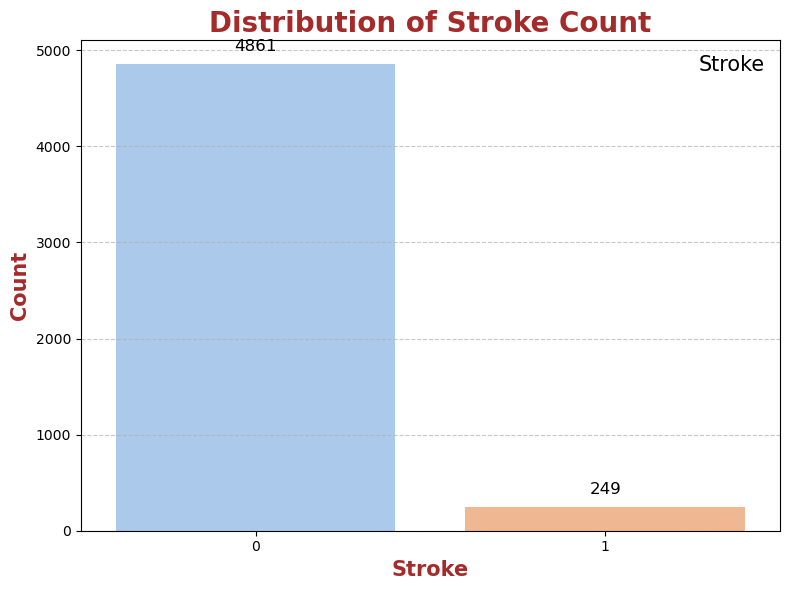

<Figure size 2400x1200 with 0 Axes>

In [27]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stroke', palette='pastel')

# Add the count labels on top of the bars
stroke_counts = df['stroke'].value_counts()
for i, count in enumerate(stroke_counts):
    plt.text(i, count + 0.02 * max(stroke_counts), count, ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Distribution of Stroke Count', fontsize=20, fontweight='bold', color='brown')
plt.xlabel('Stroke', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='brown')

# Customize legend
plt.legend(title='Stroke', title_fontsize=15, fontsize=12, frameon=False)

# Customize theme
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Increase the figure size
plt.figure(figsize=(24, 12))

# Display the plot
plt.show()


In [28]:
# Assuming data2 is a pandas DataFrame and 'stroke' is the target column
x = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target

# Initialize the oversampler with the desired sampling strategy
ros = RandomOverSampler(sampling_strategy=0.6, random_state=123)

# Perform oversampling
x_resampled, y_resampled = ros.fit_resample(x, y)

# Combine the resampled data back into a single DataFrame
oversampled_data = x_resampled.copy()
oversampled_data['stroke'] = y_resampled

# Display the oversampled data
print(oversampled_data)

# Display the class distribution before and after oversampling
print(Counter(df['stroke']))
print(Counter(oversampled_data['stroke']))


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
7772  37651  Female  69.0             1              1           No   
7773  12363    Male  64.0             0              1          Yes   
7774  68627    Male  80.0             1              1          Yes   
7775    210    Male  81.0             0              0          Yes   
7776  61843    Male  58.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_66784/4021707862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=oversampled_data, x='stroke', palette='pastel')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


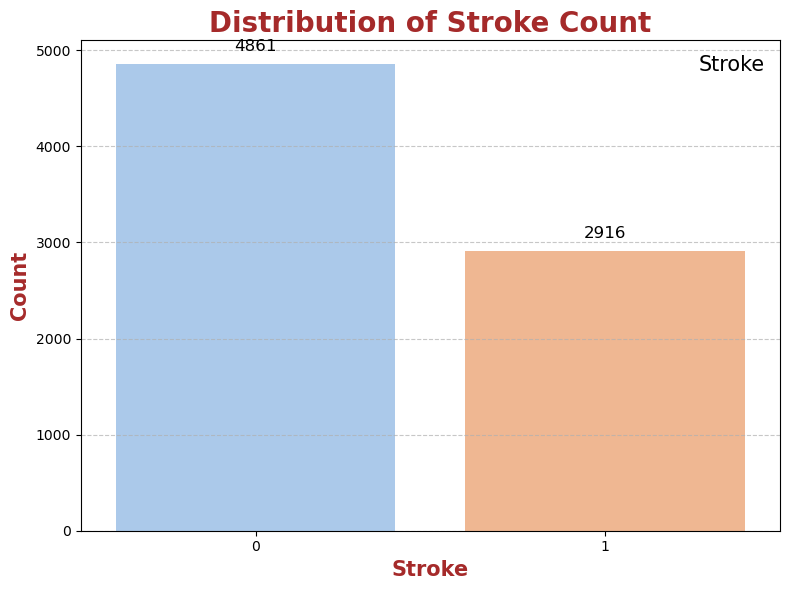

<Figure size 2400x1200 with 0 Axes>

In [29]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=oversampled_data, x='stroke', palette='pastel')

# Add the count labels on top of the bars
stroke_counts = oversampled_data['stroke'].value_counts()
for i, count in enumerate(stroke_counts):
    plt.text(i, count + 0.02 * max(stroke_counts), count, ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Distribution of Stroke Count', fontsize=20, fontweight='bold', color='brown')
plt.xlabel('Stroke', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='brown')

# Customize legend
plt.legend(title='Stroke', title_fontsize=15, fontsize=12, frameon=False)

# Customize theme
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Increase the figure size
plt.figure(figsize=(24, 12))

# Display the plot
plt.show()


In [30]:
# Drop the first column
oversampled_data = oversampled_data.iloc[:, 1:]

# Display the updated oversampled data
print(oversampled_data)


      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
7772  Female  69.0             1              1           No  Self-employed   
7773    Male  64.0             0              1          Yes       Govt_job   
7774    Male  80.0             1              1          Yes        Private   
7775    Male  81.0             0              0          Yes  Self-employed   
7776    Male  58.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

# EDA

In [32]:
df= df.iloc[:,1:]

In [33]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## univariate analysis

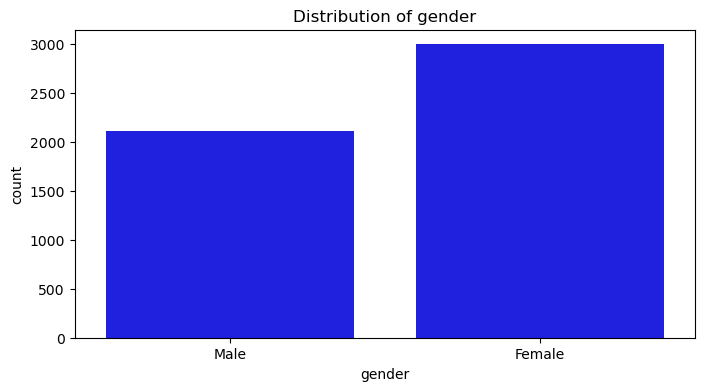

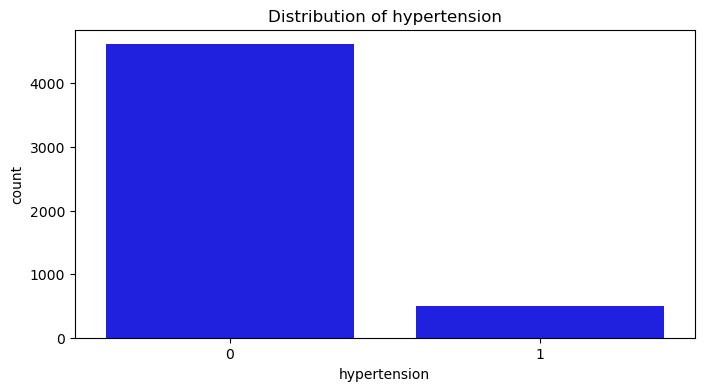

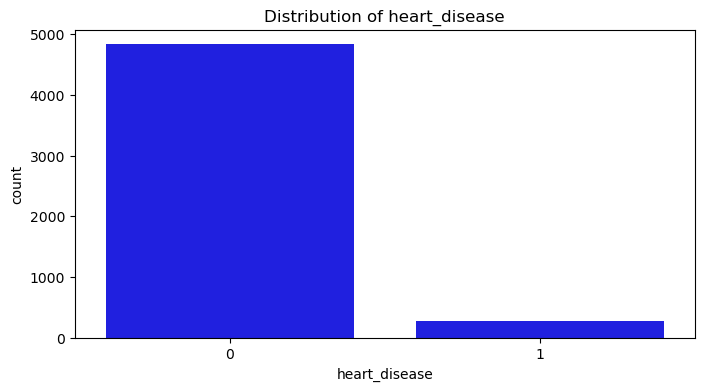

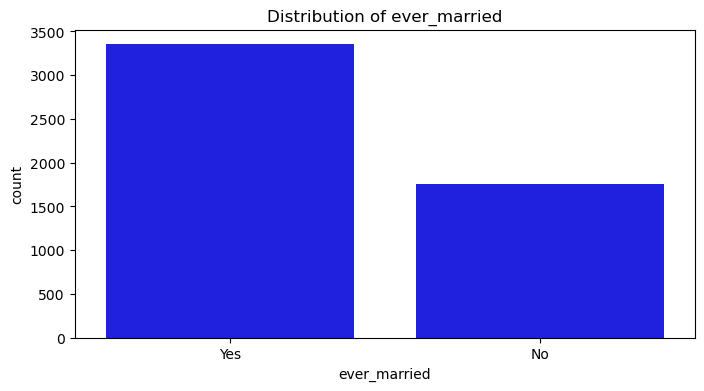

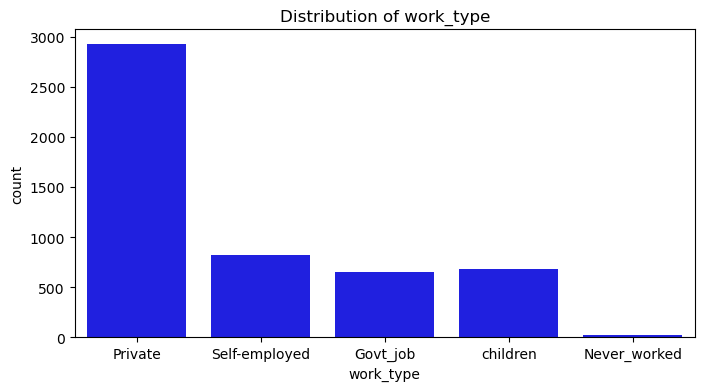

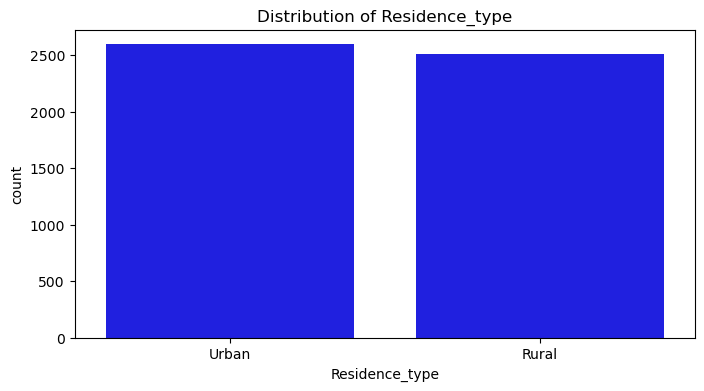

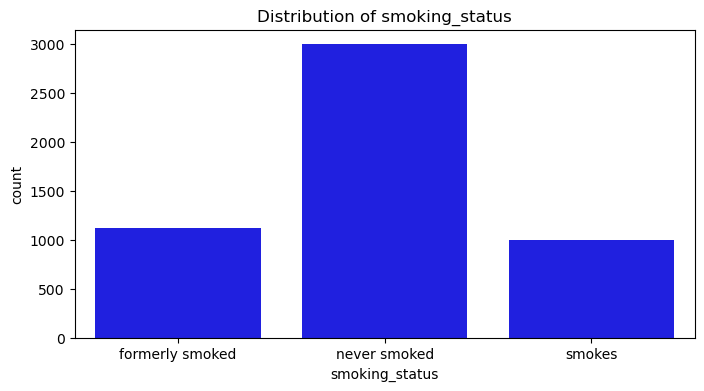

In [35]:
#  Categorical Variables
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                       'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col,color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()



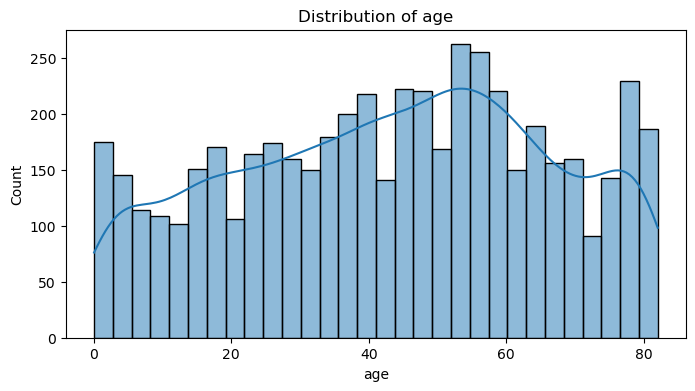

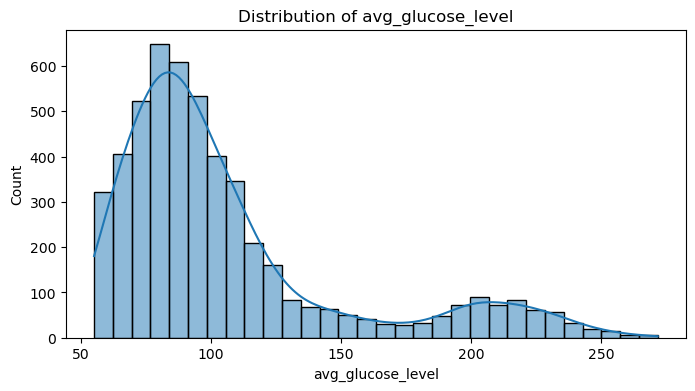

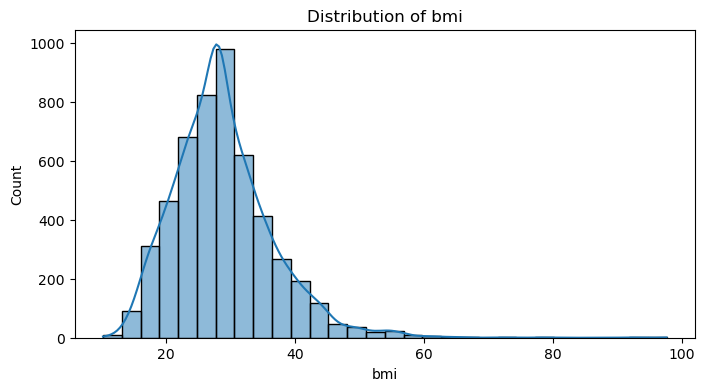

In [36]:
# 2.2 Numerical Variables
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()



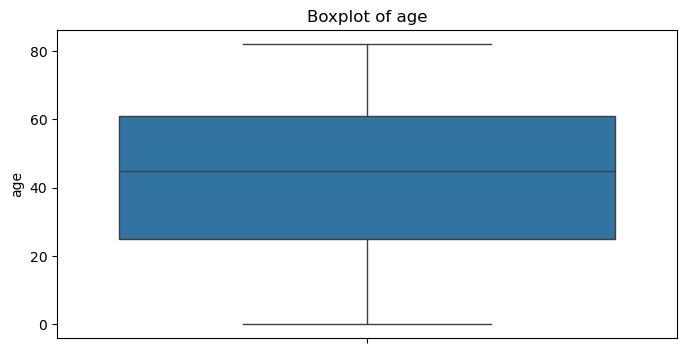

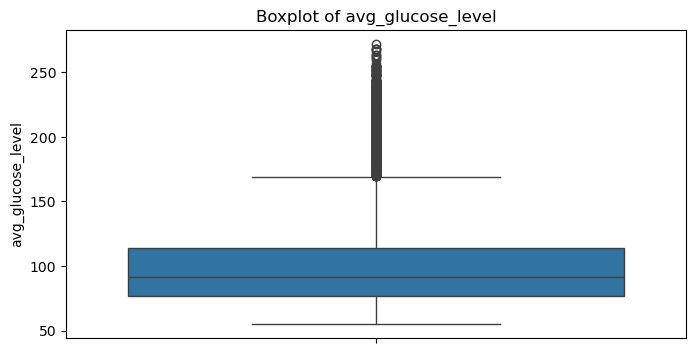

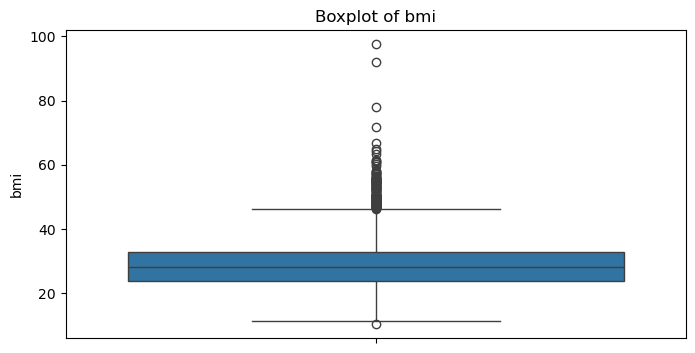

In [37]:
# Boxplots to detect outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()



In [38]:
# 2.3 Summary Statistics
print(df[numerical_columns].describe())


               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.226614         106.147677    28.862035
std      22.612647          45.283560     7.699562
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.800000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000


## bivariate analysis

### gender vs hyptertension

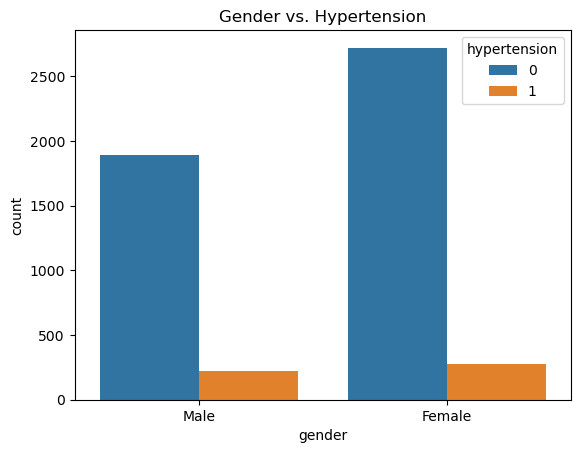

In [41]:
#Categorical vs. Categorical ( Gender vs. hypertension)
sns.countplot(data=df, x='gender', hue='hypertension')
plt.title('Gender vs. Hypertension')
plt.show()


In [42]:
# Chi-square test for independence between gender and hypertension
contingency_table = pd.crosstab(df['gender'], df['hypertension'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 0.1407604543189001


### gender vs heart disease

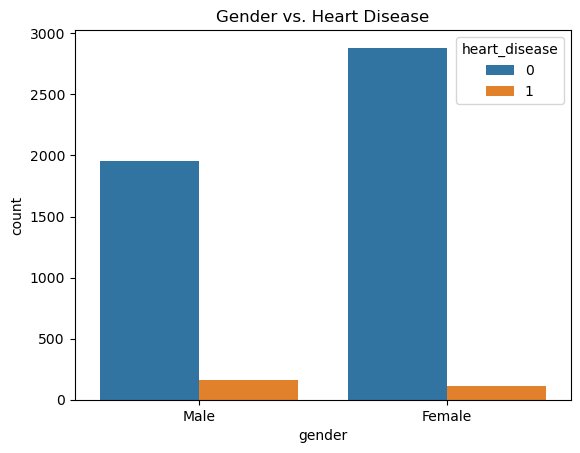

In [44]:
sns.countplot(data=df, x='gender', hue='heart_disease')
plt.title('Gender vs. Heart Disease')
plt.show()

In [45]:
# Chi-square test for independence between gender and heart disease
contingency_table = pd.crosstab(df['gender'], df['heart_disease'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 1.3226484144526582e-09


### hypertension vs heart disease

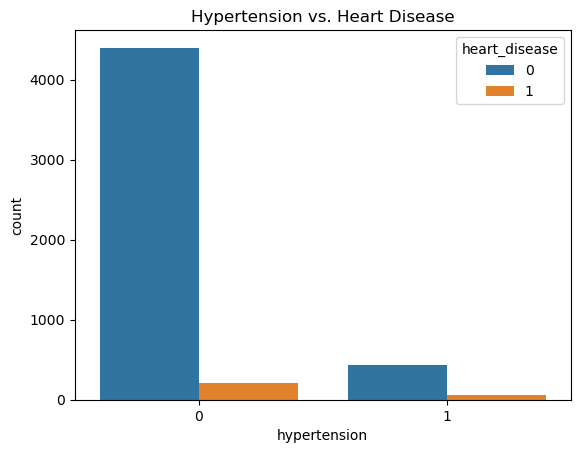

In [47]:
sns.countplot(data=df, x='hypertension', hue='heart_disease')
plt.title('Hypertension vs. Heart Disease')
plt.show()

In [48]:
# Chi-square test for independence between hypertension and heart disease
contingency_table = pd.crosstab(df['hypertension'], df['heart_disease'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 2.208889768960281e-14


### married status vs hypertension

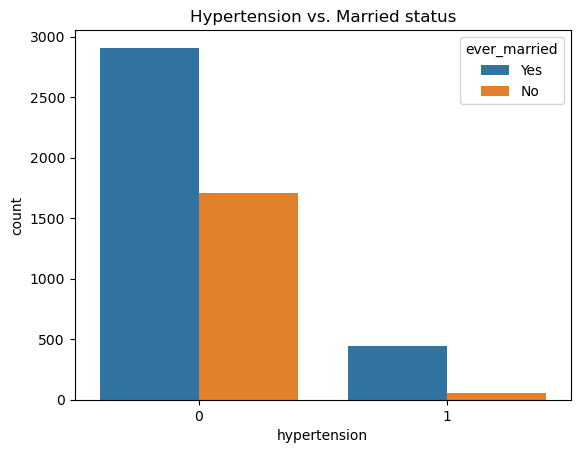

In [50]:
sns.countplot(data=df, x='hypertension', hue='ever_married')
plt.title('Hypertension vs. Married status')
plt.show()

In [51]:
# Chi-square test for independence between hypertension and Married status
contingency_table = pd.crosstab(df['hypertension'], df['ever_married'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 1.414675550078404e-31


### smoking status vs gender

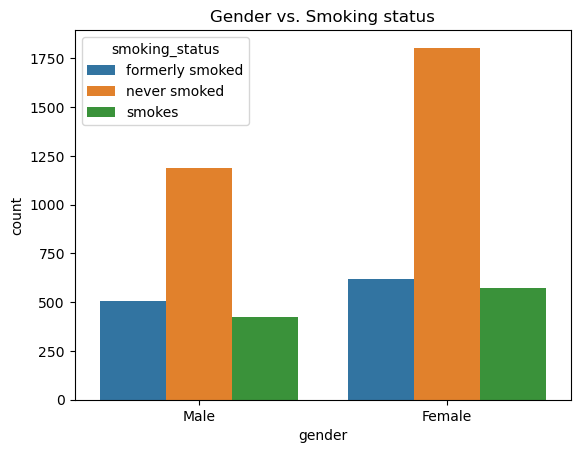

In [53]:
sns.countplot(data=df, x='gender', hue='smoking_status')
plt.title('Gender vs. Smoking status')
plt.show()

In [54]:
# Chi-square test for independence between gender and smoking status
contingency_table = pd.crosstab(df['gender'], df['smoking_status'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 0.0066028378635647166


### smoking status vs heart disease

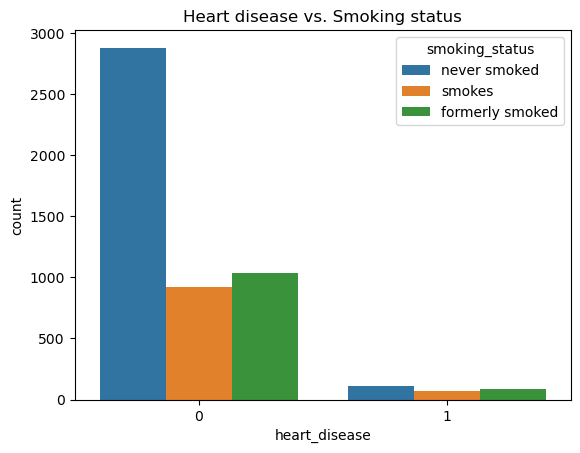

In [56]:
sns.countplot(data=df, x='heart_disease', hue='smoking_status')
plt.title('Heart disease vs. Smoking status')
plt.show()

In [57]:
# Chi-square test for independence between heart disease and smoking status
contingency_table = pd.crosstab(df['heart_disease'], df['smoking_status'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 3.283076630341185e-08


### work type vs hypertension

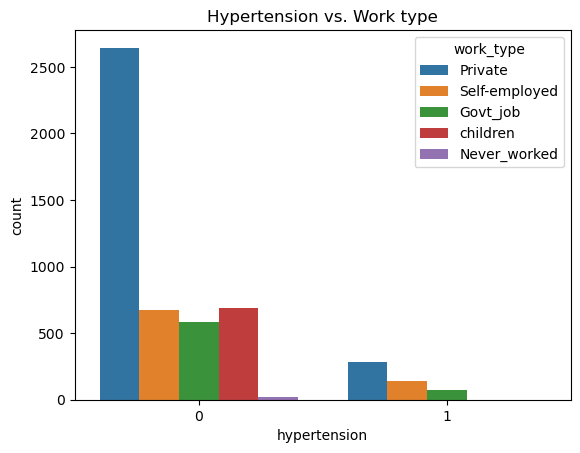

In [59]:
sns.countplot(data=df, x='hypertension', hue='work_type')
plt.title('Hypertension vs. Work type')
plt.show()

In [60]:
# Chi-square test for independence between hypertension and Married status
contingency_table = pd.crosstab(df['hypertension'], df['work_type'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 3.0066807687032264e-28


### residence type vs hypertension

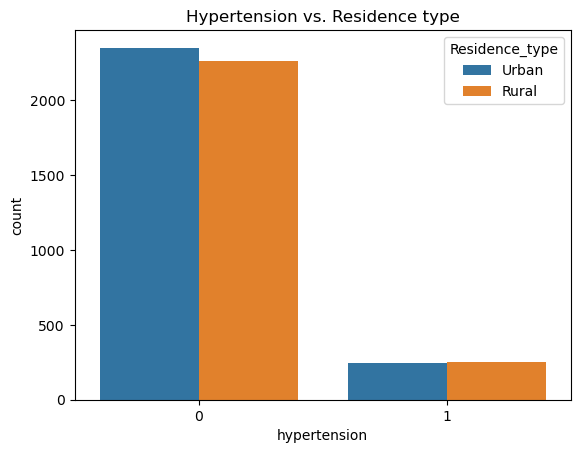

In [62]:
sns.countplot(data=df, x='hypertension', hue='Residence_type')
plt.title('Hypertension vs. Residence type')
plt.show()

In [63]:
# Chi-square test for independence between hypertension and Married status
contingency_table = pd.crosstab(df['hypertension'], df['Residence_type'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 0.6041003928812094


### residence type vs smoking status

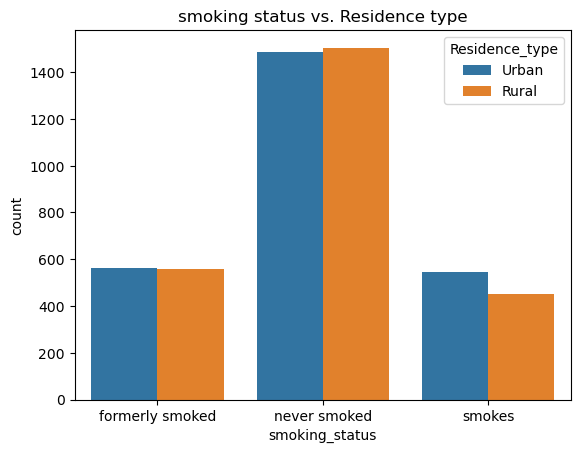

In [65]:
sns.countplot(data=df, x='smoking_status', hue='Residence_type')
plt.title('smoking status vs. Residence type')
plt.show()

In [66]:
# Chi-square test for independence between smoking status and residence type
contingency_table = pd.crosstab(df['smoking_status'], df['Residence_type'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test p-value: {p}')

Chi-square test p-value: 0.023433370360427554


### age vs hyptertension

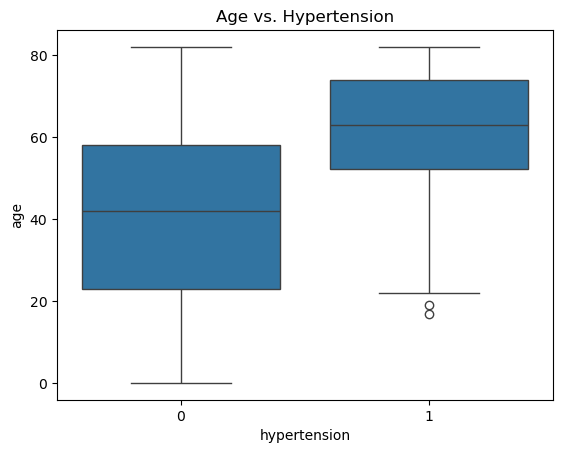

In [68]:
sns.boxplot(data=df, x='hypertension', y='age')
plt.title('Age vs. Hypertension')
plt.show()


In [69]:
# T-test for age differences between age and hypertension groups
hypertension_group = df[df['hypertension'] == 1]['age']
non_hypertension_group = df[df['hypertension'] == 0]['age']
t_stat, p_val = ttest_ind(hypertension_group, non_hypertension_group)
print(f'T-test p-value: {p_val}')

T-test p-value: 2.8602624388697996e-90


In [70]:
### age vs bmi , age vs avg_glucose level , avgglucose level vs bmi

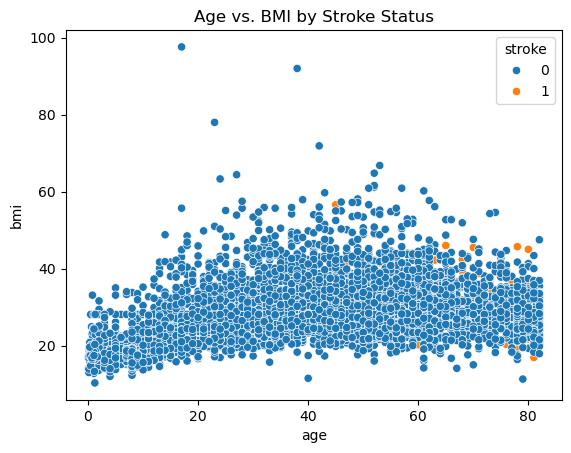

In [71]:
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke')
plt.title('Age vs. BMI by Stroke Status')
plt.show()


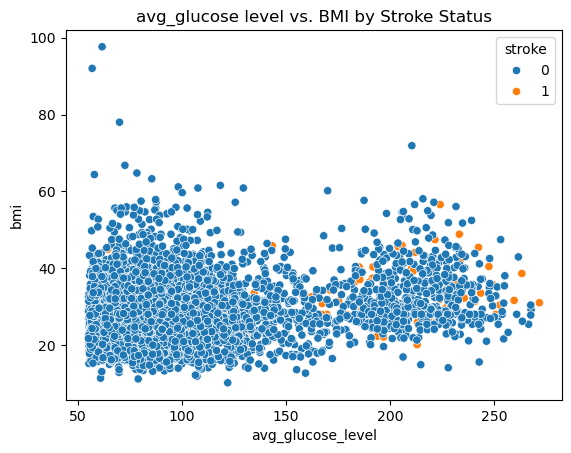

In [72]:
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke')
plt.title('avg_glucose level vs. BMI by Stroke Status')
plt.show()

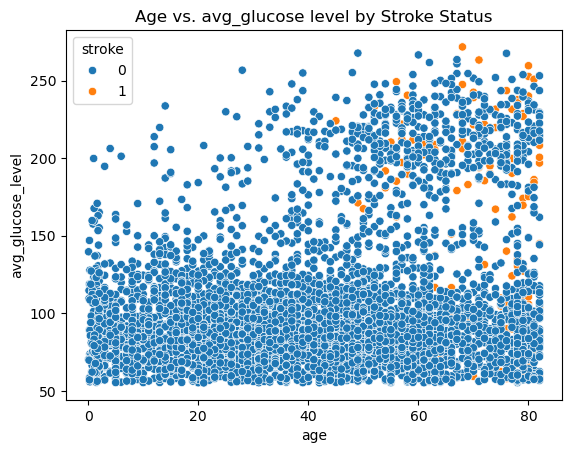

In [73]:
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.title('Age vs. avg_glucose level by Stroke Status')
plt.show()

In [74]:
# Correlation between age and BMI
correlation = df[['age', 'bmi','avg_glucose_level']].corr()
print(correlation)

                        age       bmi  avg_glucose_level
age                1.000000  0.324296           0.238171
bmi                0.324296  1.000000           0.166876
avg_glucose_level  0.238171  0.166876           1.000000


## target variable analysis

### gender vs stroke

In [77]:
# Separate categorical and numerical columns (excluding the target variable)
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                       'work_type', 'Residence_type', 'smoking_status']

numerical_columns = ['age', 'avg_glucose_level', 'bmi']


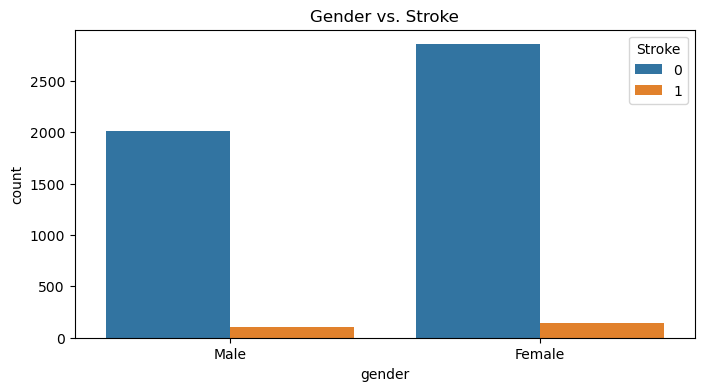

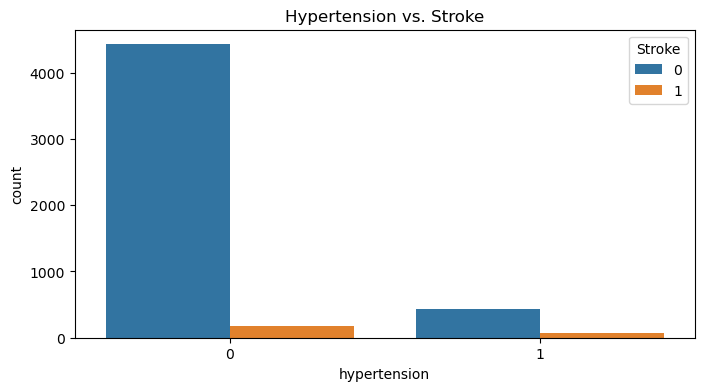

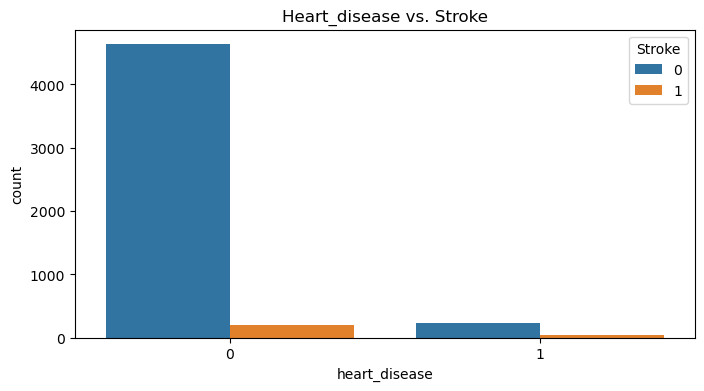

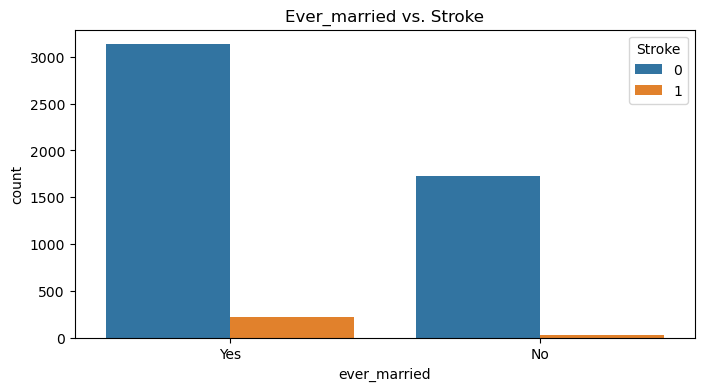

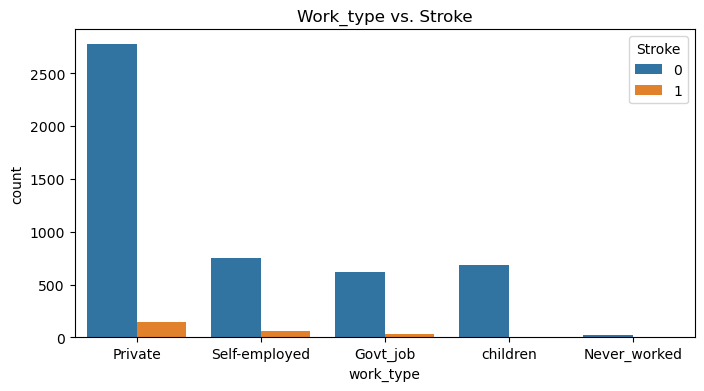

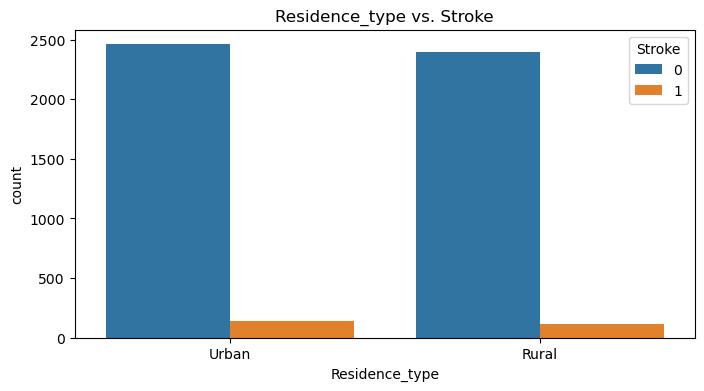

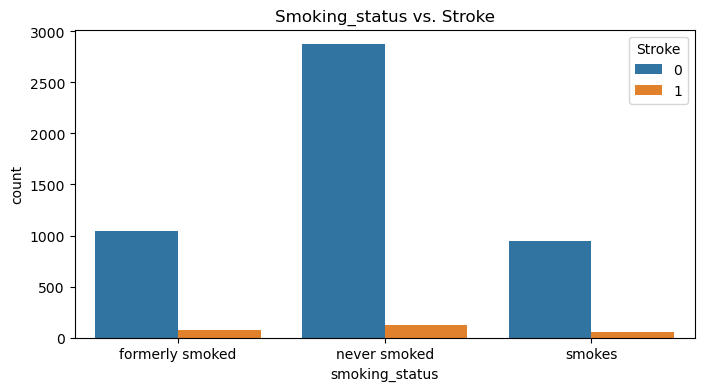

In [78]:
# Loop through categorical columns and plot their relationship with the target variable 'stroke'
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f'{col.capitalize()} vs. Stroke')
    plt.legend(title='Stroke')
    plt.show()


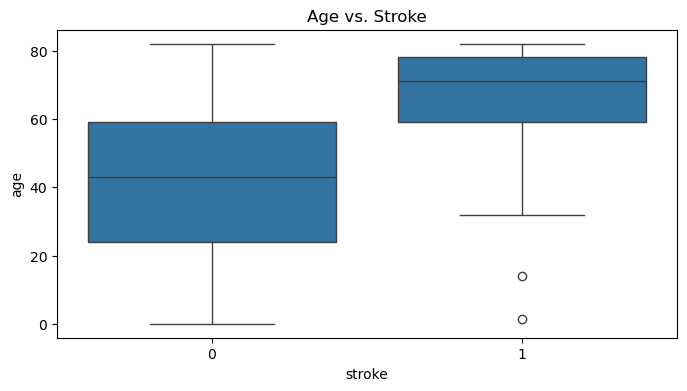

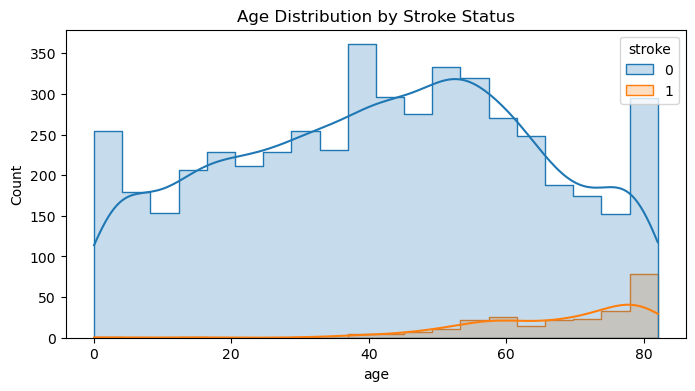

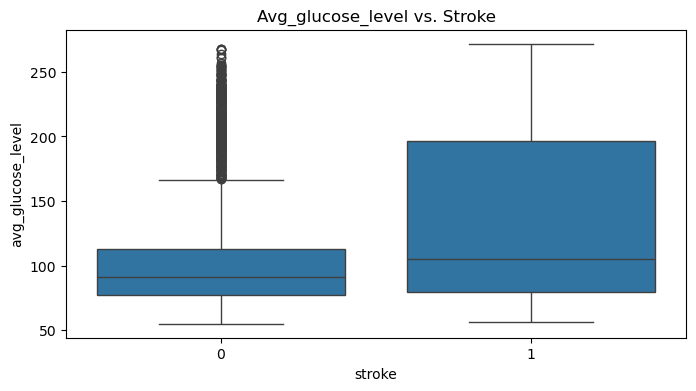

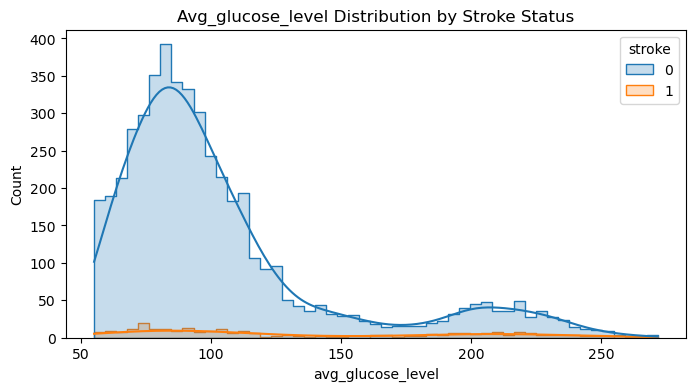

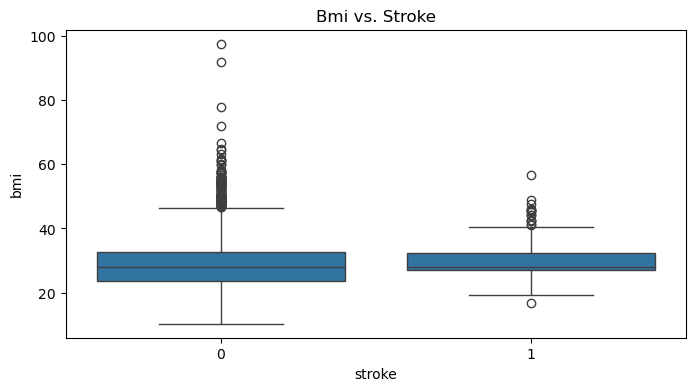

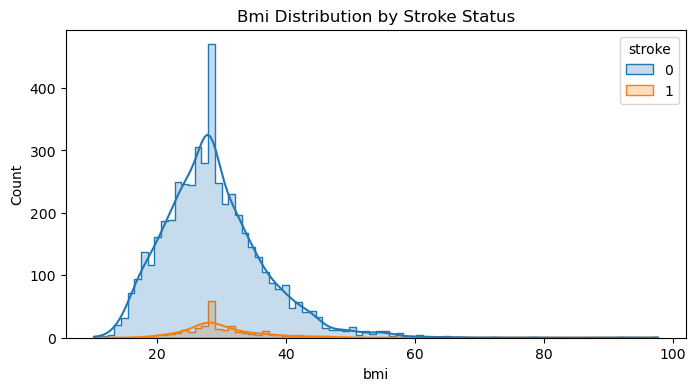

In [79]:
# Loop through numerical columns and plot their relationship with the target variable 'stroke'
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='stroke', y=col)
    plt.title(f'{col.capitalize()} vs. Stroke')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='stroke', kde=True, element='step')
    plt.title(f'{col.capitalize()} Distribution by Stroke Status')
    plt.show()


In [80]:
# Perform Chi-square test for each categorical variable vs. Stroke
print("Chi-Square Test Results:")
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['stroke'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p:.4f} {'(Dependent)' if p < 0.05 else '(Independent)'}")



Chi-Square Test Results:
gender: p-value = 0.5580 (Independent)
hypertension: p-value = 0.0000 (Dependent)
heart_disease: p-value = 0.0000 (Dependent)
ever_married: p-value = 0.0000 (Dependent)
work_type: p-value = 0.0000 (Dependent)
Residence_type: p-value = 0.2983 (Independent)
smoking_status: p-value = 0.0002 (Dependent)


In [81]:
print("\nT-Test Results:")
# Perform T-test for each numerical variable vs. Stroke
for col in numerical_columns:
    stroke_group = df[df['stroke'] == 1][col]
    non_stroke_group = df[df['stroke'] == 0][col]
    t_stat, p_val = ttest_ind(stroke_group, non_stroke_group, equal_var=False)  # Assume unequal variance
    print(f"{col}: p-value = {p_val:.4f} {'(Significant difference)' if p_val < 0.05 else '(No significant difference)'}")


T-Test Results:
age: p-value = 0.0000 (Significant difference)
avg_glucose_level: p-value = 0.0000 (Significant difference)
bmi: p-value = 0.0010 (Significant difference)


## multivariate analysis

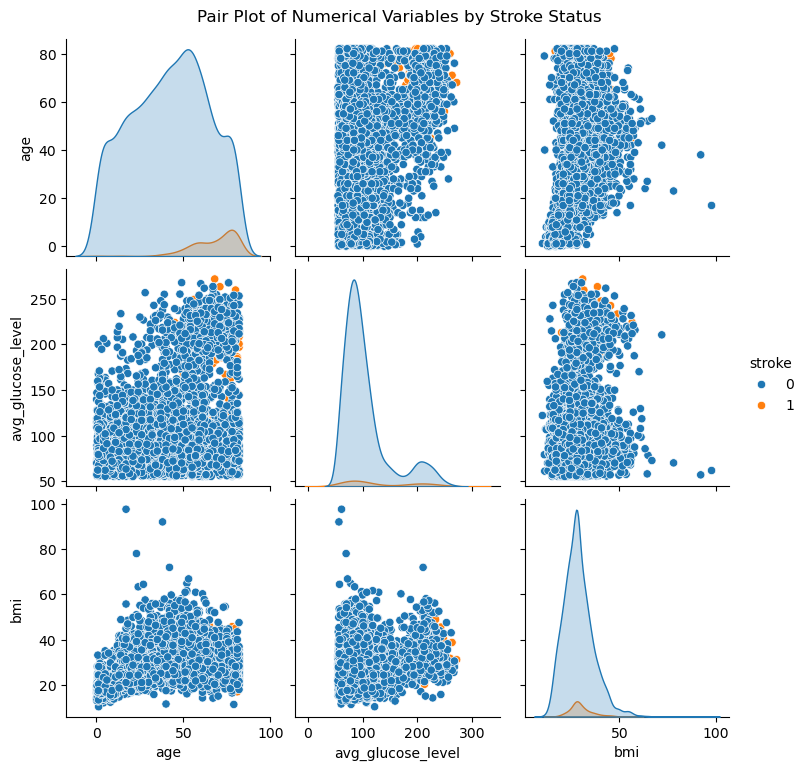

In [83]:
#  Pair Plot
sns.pairplot(df, hue='stroke', vars=['age', 'avg_glucose_level', 'bmi'])
plt.suptitle('Pair Plot of Numerical Variables by Stroke Status', y=1.02)
plt.show()


In [84]:
# Heatmap of Correlations
#correlation_matrix = df.corr()
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Correlation Matrix Heatmap')
#plt.show()

# model fitting

# splitting dataset into training set and test set

In [87]:
oversampled_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
7772,Female,69.0,1,1,No,Self-employed,Urban,72.17,36.8,never smoked,1
7773,Male,64.0,0,1,Yes,Govt_job,Urban,74.10,28.8,smokes,1
7774,Male,80.0,1,1,Yes,Private,Urban,175.29,31.5,formerly smoked,1
7775,Male,81.0,0,0,Yes,Self-employed,Rural,91.54,31.4,never smoked,1


In [88]:
x = oversampled_data.iloc[:, :-1].values
y = oversampled_data.iloc[:, -1].values

In [89]:
count_ones = np.sum(y == 1)

# Count the number of 0's
count_zeros = np.sum(y == 0)

print(f"Number of 1's: {count_ones}")
print(f"Number of 0's: {count_zeros}")

Number of 1's: 2916
Number of 0's: 4861


# encoding

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5,9])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [92]:
x[1]


array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 'Female', 61.0, 0, 0,
       'Yes', 'Rural', 202.21, 28.1], dtype=object)

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 8] = le.fit_transform(x[:, 8])

# Encode the 2nd column (index 2)
x[:, 12] = le.fit_transform(x[:, 12])
x[:, 13] = le.fit_transform(x[:, 13])


In [94]:
x[1]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0, 61.0, 0, 0, 1, 0,
       202.21, 28.1], dtype=object)

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [96]:
x_train[1]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 53.0, 0, 0, 1, 1, 113.4,
       35.1], dtype=object)

In [97]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# feature scaling

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 14:] = sc.fit_transform(x_train[:, 14:])
x_test[:, 14:] = sc.transform(x_test[:, 14:])

In [100]:
x_train[1]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 53.0, 0, 0, 1, 1,
       -0.027825713686491775, 0.8194668389895634], dtype=object)

In [101]:
x_train[:, 9:10] = sc.fit_transform(x_train[:, 9:10])
x_test[:, 9:10] = sc.transform(x_test[:, 9:10])

In [102]:
x_train[1]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 0.06725756114219811, 0,
       0, 1, 1, -0.027825713686491775, 0.8194668389895634], dtype=object)

In [103]:
x_test[1]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1, 0.9376633556727748, 1,
       0, 1, 1, 1.5266266082285742, 0.4983162093708893], dtype=object)

## logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [106]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[780 152]
 [217 407]]


0.762853470437018

## k-nn model

In [109]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #5 neighbors and minkowski metric
# and p=2 for the euclidian distance
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [110]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [111]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[821 111]
 [  5 619]]


0.9254498714652957

## kernal svm

In [113]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [114]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [115]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[811 121]
 [150 474]]


0.8258354755784062

## naive bayes

In [117]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [118]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 0]
 [1 0]]


In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[239 693]
 [  5 619]]


0.5514138817480719

## descision tree classification

In [121]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [122]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [123]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[887  45]
 [  0 624]]


0.9710796915167095

## random forest classification

In [125]:
from sklearn.ensemble import RandomForestClassifier
classifier_random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_random_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [126]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [127]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[887  45]
 [  0 624]]


0.9710796915167095

# cross validation

In [129]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_random_forest, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.39 %
Standard Deviation: 0.43 %


## xgboost 

In [131]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [132]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_xg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[897  35]
 [  0 624]]


0.9775064267352185

In [134]:
accuracies = cross_val_score(estimator = classifier_xg, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.88 %
Standard Deviation: 0.53 %


In [274]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
precision_score(y_test, y_pred)


0.9468892261001517

In [272]:
f1_score(y_test, y_pred)

0.9727201870615745